In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import importlib
import download_clean_data as dc
import ipca
import metrics
import kernel_regression as kr
import validaton as val
import pickle
importlib.reload(dc) 
importlib.reload(ipca)
importlib.reload(metrics)
importlib.reload(kr)
importlib.reload(val)

<module 'validaton' from '/Users/matteoferrazzi/Documents/GitHub/ML-project-2/validaton.py'>

In [4]:
folder_path = "/Users/matteoferrazzi/Documents/GitHub/ML-project-2/Data/monthly_data"
N = 100
start_date = 20000000
ending_date = 20060000
data, ret = dc.download_clean_data(folder_path, start_date, ending_date,N)

In [22]:
with open('dict_rq.pickle', 'rb') as handle:
    dict_rq = pickle.load(handle)

with open('dict_gaussian.pickle', 'rb') as handle:
    dict_gaussian = pickle.load(handle)

with open('dict_IPCA_reg.pickle', 'rb') as handle:
    dict_IPCA_reg = pickle.load(handle)

In [25]:
dict_gaussian

{('Gaussian', 10, 1000, 5): array([0.]),
 ('Gaussian', 10, 100, 5): array([0.]),
 ('Gaussian', 10, 10, 5): array([0.00197325]),
 ('Gaussian', 10, 1, 5): array([0.0818803]),
 ('Gaussian', 10, 0.1, 5): array([0.1315136]),
 ('Gaussian', 10, 0.01, 5): array([0.17775891]),
 ('Gaussian', 10, 0.001, 5): array([0.18916087]),
 ('Gaussian', 10, 0.0001, 5): array([0.17951079]),
 ('Gaussian', 1, 1000, 5): array([0.]),
 ('Gaussian', 1, 100, 5): array([0.00459482]),
 ('Gaussian', 1, 10, 5): array([0.08218983]),
 ('Gaussian', 1, 1, 5): array([0.13199401]),
 ('Gaussian', 1, 0.1, 5): array([0.17328816]),
 ('Gaussian', 1, 0.01, 5): array([0.17830314]),
 ('Gaussian', 1, 0.001, 5): array([0.15739944]),
 ('Gaussian', 1, 0.0001, 5): array([0.16634296]),
 ('Gaussian', 0.1, 1000, 5): array([0.00527775]),
 ('Gaussian', 0.1, 100, 5): array([0.08221589]),
 ('Gaussian', 0.1, 10, 5): array([0.13221638]),
 ('Gaussian', 0.1, 1, 5): array([0.17684761]),
 ('Gaussian', 0.1, 0.1, 5): array([0.17783483]),
 ('Gaussian', 0

In [ ]:
def surface_gaussian(dictionary, lambdas1, lambdas2, i, j):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            temp = []
            for k,v in dictionary.items():
                if k[i] == lambda1 and k[j] == lambda2 and k[3]==20:
                    temp.append(v)
            if temp != []:
                z[l1, l2] = max(temp)
    
    return z

In [1]:
def surface_IPCA(dictionary, lambdas1, lambdas2, i, j):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            temp = []
            for k,v in dictionary.items():
                if k[i] == lambda1 and k[j] == lambda2:
                    z[l1, l2] = max(temp)
    
    return z

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface_IPCA(dict_IPCA_reg, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), 1, 2)
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)

NameError: name 'plt' is not defined

In [35]:
max(dict_IPCA_reg, key=dict_IPCA_reg.get)

('IPCA_reg', 0.01, 1000)

In [28]:
max(dict_gaussian.values())

array([0.28629647])

In [26]:
max(dict_gaussian, key=dict_gaussian.get)

('Gaussian', 0.01, 1, 20)

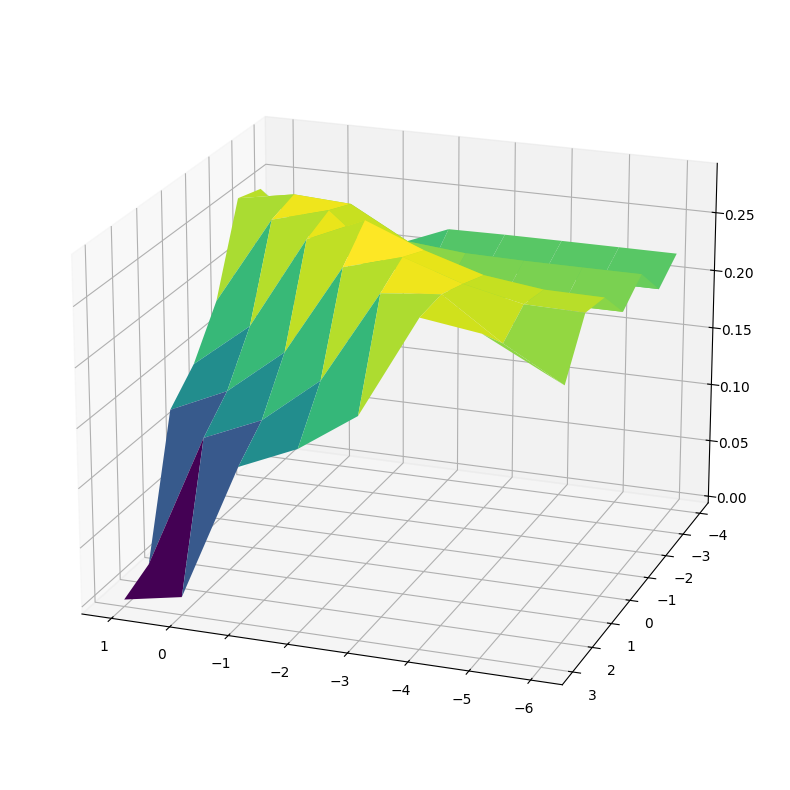

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface(dict_gaussian, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), 1, 2)
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)